In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import plotly.express as px
import statistics
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df0 = pd.read_csv('/content/drive/MyDrive/DataScienceProject/soc-sign-bitcoinotc.csv.gz', compression='gzip')

### Number of nodes:


In [ ]:
max=0
min = 1
for i,rows in df0.iterrows():
  a=int(rows["6"])
  b=int(rows["2"])
  if max< a:
    max=a;
  if max< b:
    max=b;
n=int(max)
lst = [0] * (n+1)
# print(len(lst))
for i,rows in df0.iterrows():
  a=int(rows["6"])
  b=int(rows["2"])
  lst[a]=1
  lst[b]=1

l=[]
# Node_list=[]
for i in range(1,n+1):
  if(lst[i]>=1):
    l.append(i)
# n,len(l)
num_nodes=len(l)
num_nodes

5881

### Number of Edges:

In [ ]:
len(df0)

35591

### Negativity 

In [ ]:
neg=0
for i,rows in df0.iterrows():
  if rows["4"]<0:
    neg=neg+1
print("number of negative edges=",neg)
print("% of negative edges=",neg*100/len(df0))

number of negative edges= 3563
% of negative edges= 10.01095782641679


### Degree Distribution

In [ ]:
outd={}
ind={}
for i,rows in df0.iterrows():
  source=int(rows["6"])
  target=int(rows["2"])
  if source not in outd.keys():
    outd[source]=1
  else:
    outd[source]=outd[source]+1
  if target not in ind.keys():
    ind[target]=1
  else:
    ind[target]=ind[target]+1
print(len(outd)  )
print(len(ind)  )
# print(ind)  
# print(sorted(outd.items()))  
# print(sorted(ind))   

4814
5858


#### Out Degree

In [ ]:
lst=[]
for key in outd:
  lst.append(outd[key])
print("Mean of out degree is % s"
      %(statistics.mean(lst)))
print("Variance of out degree is % s"
      %(statistics.variance(lst)))
# print(lst)
# print("Maximum and minumum out degree is ",max(lst))

Mean of out degree is 7.3932280847528045
Variance of out degree is 533.3776478777401


In [ ]:
max=lst[0]
mn=lst[0]
for i in lst:
  if max<i:
    max=i
  if mn>i:
    mn=i
print("Maximum and minumum out degree is ",max,"and",mn)

Maximum and minumum out degree is  763 and 1


In Degree

In [ ]:
lst2=[]
for key in ind:
  lst2.append(ind[key])
print("Mean of out degree is % s"
      %(statistics.mean(lst2)))
print("Variance of out degree is % s"
      %(statistics.variance(lst2)))

Mean of out degree is 6.0756230795493344
Variance of out degree is 313.4791700487894


In [ ]:
max=lst2[0]
mn=lst2[0]
for i in lst2:
  if max<i:
    max=i
  if mn>i:
    mn=i
print("Maximum and minumum in degree is ",max,"and",mn)

Maximum and minumum in degree is  535 and 1


### Rating Analysis

In [ ]:
import os
import requests
import pandas as pd

url = 'https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz'
fname = os.path.basename(url)

if not os.path.isfile(fname):
    print(f"Downloading...\n{url}")
    r = requests.get(url, allow_redirects=True)
    open(fname, 'wb').write(r.content)
else:
    print(f"Already downloaded:\n{url}")
    
# parse the file
cols = ['source', 'target', 'rating', 'time']
df = pd.read_csv(fname, names=cols, header=None)
df['time'] = pd.to_datetime(df.time * 1e9)
df = df.set_index('time')
df.shape

Downloading...
https://snap.stanford.edu/data/soc-sign-bitcoinotc.csv.gz


(35592, 3)

In [ ]:
Rating_df=df.resample('M').rating.value_counts().unstack()
Rating_df

rating,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10
time,,,,,,,,,,,,,,,,,,,,
2010-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,10.0,5.0,2.0,7.0,NaN,5.0,7.0,2.0,1.0
2010-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,26.0,4.0,6.0,3.0,1.0,NaN,2.0,1.0,NaN
2011-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.0,20.0,8.0,4.0,1.0,NaN,NaN,NaN,NaN,1.0
2011-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.0,49.0,20.0,5.0,5.0,2.0,1.0,2.0,1.0,2.0
2011-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,127.0,36.0,10.0,7.0,2.0,1.0,3.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-09-30,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,24.0,12.0,5.0,1.0,5.0,NaN,1.0,1.0,NaN,2.0
2015-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,9.0,4.0,NaN,3.0,NaN,2.0,NaN,NaN,NaN
2015-11-30,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,9.0,9.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
avg_dict={}
total_dict={}
for i,rows in Rating_df.iterrows():
  total=0
  avg=0
  by=0
  for j in range (-10,11):
    if j!=0 :
      if (math.isnan(rows[j]) ==0):
        total=total+rows[j]
        avg=avg+j*rows[j]
  avg_dict[i]=avg/total
  total_dict[i]=total
# len(avg_dict)

63

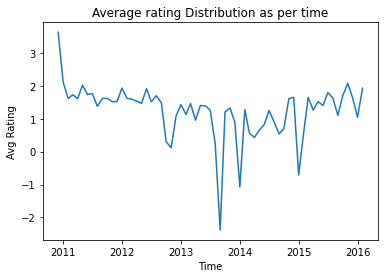

In [ ]:
import matplotlib.pylab as plt

lists = sorted(avg_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Avg Rating")
plt.title("Average rating Distribution as per time")
plt.show()

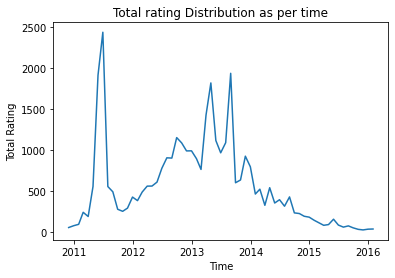

In [ ]:
lists = sorted(total_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.xlabel("Time")
plt.ylabel("Total Rating")
plt.title("Total rating Distribution as per time")
plt.show()

### Reciprocity

In [ ]:
ros=6005
cols=6005
mat = [[0 for _ in range(cols)] for _ in range(ros)]
for i,rows in df0.iterrows():
  a=int(rows["6"])-1
  b=int(rows["2"])-1
  # print(rows["4"])
  mat[a][b]=1
# print(mat)
rec=0
for i in range(ros):
  for j in range(cols):
    if(mat[i][j]==1 and mat[j][i]==1):
      rec=rec+1
print("The reciprocacy ratio of our network is ",rec/len(df))

The reciprocacy ratio of our network is  0.7922566868959316
